# **ANSWERING QUESTION 1, 2**
---

## **IMPORT**

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

## **ĐỌC DỮ LIỆU**

In [2]:
df = pd.read_csv("../Data/Time-Wasters on Social Media_Cleaned.csv")
df.head(5)

,Income,Profession,Platform,Total Time Spent,Number of Sessions,Video Category,Importance Score,Time Spent On Video,Number of Videos Watched,Frequency,ProductivityLoss,Satisfaction,Watch Reason,Self Control,Addiction Level,CurrentActivity,Female,Male,Age Group
0,82812,Engineer,Instagram,80,17,Pranks,5,26,22,Night,3,7,Procrastination,5,5,Commuting,False,True,3
1,27999,Artist,Instagram,228,14,Pranks,6,25,31,Afternoon,5,5,Habit,7,3,At school,True,False,3
2,42436,Engineer,Facebook,30,6,Vlogs,3,9,7,Evening,6,4,Entertainment,8,2,At home,True,False,2
3,62963,Waiting staff,YouTube,101,19,Vlogs,2,6,41,Night,3,7,Habit,5,5,Commuting,False,True,4
4,22096,Manager,TikTok,136,6,Gaming,7,13,21,Morning,8,2,Boredom,10,0,At home,False,True,2


## **Câu 1: Thời gian sử dụng nền tảng, thể loại video hay lý do xem video ảnh hưởng nhất mức độ nghiện của người dùng.**

### **1.1. Tiền xử lý**

- Chọn các cột liên quan từ DataFrame: Total Time Spent, Video Category và Watch Reason làm đặc trưng (X), Addiction Level làm nhãn (y).
- Sử dụng One-hot Encoding để chuyển dữ liệu danh mục (Video Category, Watch Reason) thành dữ liệu số.
- Tách dữ liệu thành tập huấn luyện (80%) và kiểm tra (20%) để đánh giá mô hình.
- Sử dụng Random Forest Regressor để dự đoán Addiction Level dựa trên các đặc trưng.
- Lấy tầm quan trọng của từng đặc trưng từ thuộc tính feature_importances_ của mô hình, phản ánh mức độ ảnh hưởng của từng đặc trưng đến kết quả dự đoán.

In [3]:
X = df[['Total Time Spent', 'Video Category', 'Watch Reason']]
y = df['Addiction Level']

# One-hot encoding cho các cột dạng danh mục
X = pd.get_dummies(X)

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo và huấn luyện mô hình Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Trích xuất tầm quan trọng của các đặc trưng
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

### **1.2. Trực quan hóa dữ liệu**

Vẽ biểu đồ thanh ngang để hiển thị mức độ quan trọng của từng đặc trưng, giúp dễ dàng so sánh và phân tích.

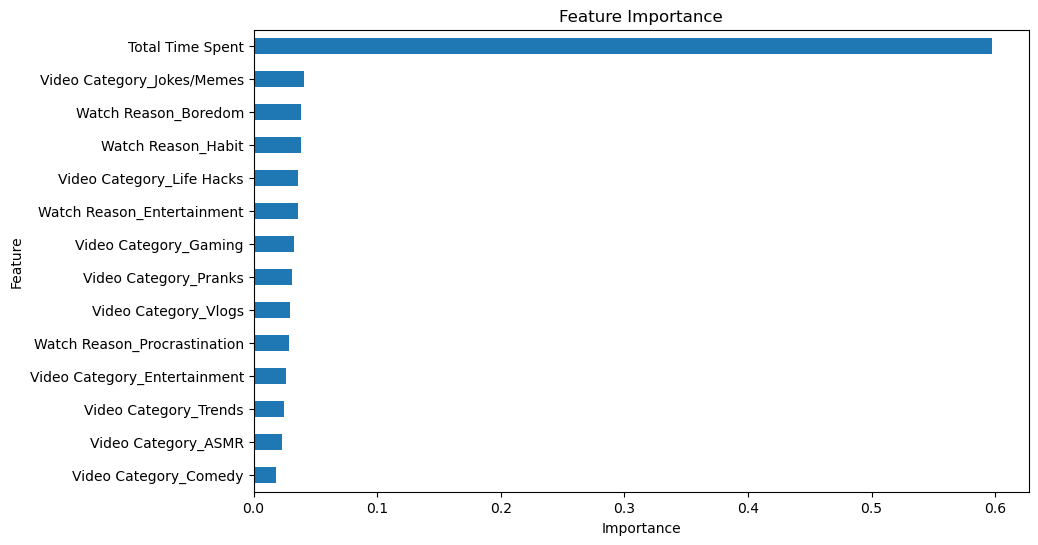

In [4]:
feature_importances.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### **1.3. Nhận xét**

- Biểu đồ cho thấy rõ ràng rằng "Total Time Spent" là yếu tố quan trọng nhất, vượt hẳn so với các yếu tố khác. Thời gian tổng cộng mà người dùng dành cho việc xem video có ảnh hưởng lớn nhất đến mức độ nghiện (Addiction Level). 
- Các yếu tố khác trong hai cột "Video Category" và "Watch Reason" có tầm quan trọng rất thấp và khá là ngang nhau, cho thấy rằng loại video và lý do xem đóng vai trò quan trọng ít hơn trong việc ảnh hưởng đến mức độ nghiện của người dùng.

## **Câu 2: Có sự khác biệt nào về sự kiểm soát bản thân và mức độ nghiện giữa các nhóm nghề nghiệp khác nhau (sinh viên và người đi làm) không?**

### **2.1. Tiền xử lý**

Chia cột **Profession** thành 2 nhóm là *Student* (sinh viên) và **Employed** (người đi làm)

In [5]:
df_students = df[df['Profession'] == 'Students']
df_employed = df[df['Profession'] != 'Students']

Tính giá trị trung bình và độ biến động (độ lệch chuẩn) của hai cột **Self Control** và **Addition Level**

In [6]:
mean_students = df_students[['Self Control', 'Addiction Level']].mean()
std_students = df_students[['Self Control', 'Addiction Level']].std()

mean_employed = df_employed[['Self Control', 'Addiction Level']].mean()
std_employed = df_employed[['Self Control', 'Addiction Level']].std()

students = pd.DataFrame({
    'Mean (Student)': mean_students,
    'Std (Student)': std_students
})

employed = pd.DataFrame({
    'Mean (Employed)': mean_employed,
    'Std (Employed)': std_employed
})

final = pd.concat([students, employed], axis=1)
final

,Mean (Student),Std (Student),Mean (Employed),Std (Employed)
Self Control,6.987805,2.161786,7.128647,2.023934
Addiction Level,3.012195,2.161786,2.871353,2.023934


Thêm một cột mới có tên Profession_Grouped để chia dữ liệu thành hai nhóm **Students** và **Employed**. Tất cả các dòng có giá trị 'Profession' là 'Students' được giữ nguyên, trong khi các dòng khác được gộp lại thành nhóm 'Employed'.

In [7]:
# Thay thế các giá trị khác "Students" bằng "Employed"
df['Profession_Grouped'] = df['Profession'].apply(lambda x: 'Students' if x == 'Students' else 'Employed')

### **2.2. Trực quan hóa dữ liệu**

Trực quan hóa sự khác biệt giữa các nhóm nghề nghiệp

In [8]:
# Tính toán giới hạn cho trục y của biểu đồ để dữ liệu hiển thị rõ ràng và dễ so sánh
def calculate_ylim_bounds(df, col1, col2):
    # Tính giá trị trung bình 
    avg_self_control = df.groupby(col1)[col2].mean().reset_index()
    # Tính min và max từ các giá trị trung bình
    min_value = avg_self_control[col2].min()
    max_value = avg_self_control[col2].max()
    # Tính biên độ tự động
    margin = max_value - min_value
    return min_value - margin, max_value + margin

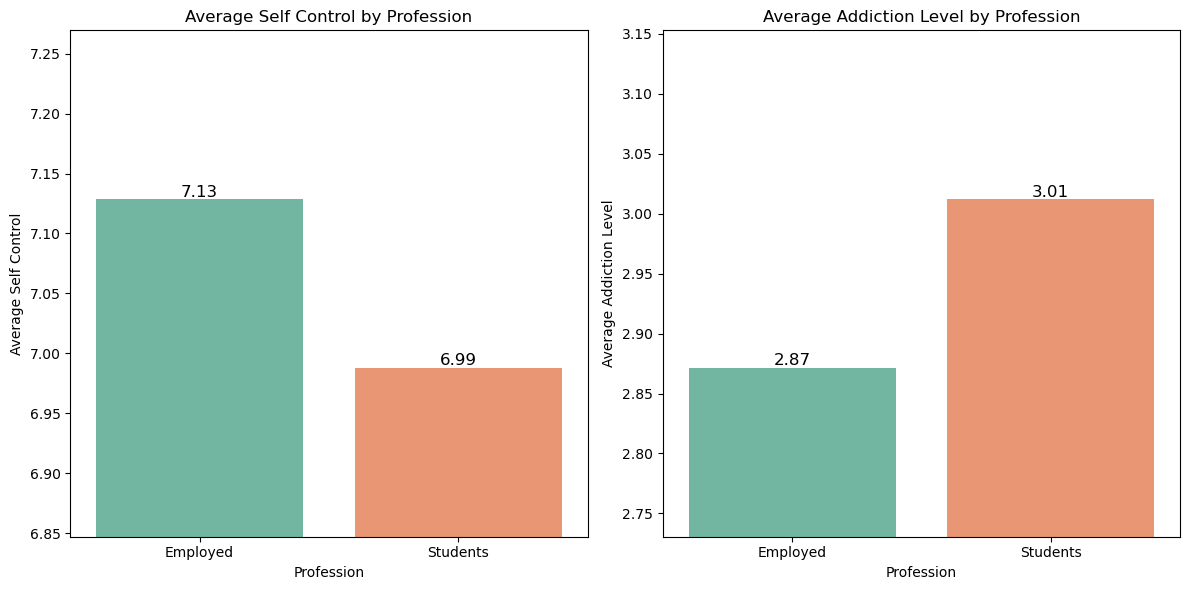

In [9]:
plt.figure(figsize=(12, 6))

# Barplot cho Self Control
plt.subplot(1, 2, 1)
ax = sns.barplot(x='Profession_Grouped', y='Self Control', data=df, ci=None, palette='Set2')
plt.title('Average Self Control by Profession')
plt.ylabel('Average Self Control')
plt.xlabel('Profession')

# Thêm giá trị lên mỗi cột
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')
    
# Điều chỉnh trục y để dễ so sánh
min_ylim, max_ylim = calculate_ylim_bounds(df, 'Profession_Grouped', 'Self Control')
plt.ylim(min_ylim, max_ylim)

# Barplot cho Addiction Level
plt.subplot(1, 2, 2)
ax = sns.barplot(x='Profession_Grouped', y='Addiction Level', data=df, ci=None, palette='Set2')
plt.title('Average Addiction Level by Profession')
plt.ylabel('Average Addiction Level')
plt.xlabel('Profession')

# Thêm giá trị lên mỗi cột
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')
    
# Điều chỉnh trục y để dễ so sánh
min_ylim, max_ylim = calculate_ylim_bounds(df, 'Profession_Grouped', 'Addiction Level')
plt.ylim(min_ylim, max_ylim)

plt.tight_layout()
plt.show()


### **2.3. Nhận xét**

Mức độ Kiểm soát Bản thân (Self Control):

- Mức độ kiểm soát bản thân trung bình của nhóm sinh viên là 6.99, trong khi nhóm người đi làm có mức trung bình là 7.13. Nó chỉ ra rằng người đi làm có khả năng kiểm soát bản thân nhỉnh hơn một chút so với sinh viên.
- Tuy nhiên, độ lệch chuẩn của cả hai nhóm đều khá cao (2.16 cho sinh viên và 2.02 cho người đi làm), cho thấy sự biến động lớn trong mức độ kiểm soát bản thân giữa các cá nhân trong mỗi nhóm. Điều này phản ánh sự đa dạng về khả năng kiểm soát hành vi, mà có thể bị ảnh hưởng bởi các yếu tố cá nhân, môi trường và thói quen sống của từng cá nhân.

Mức độ Nghiện (Addiction Level):

- Mức độ nghiện trung bình của nhóm sinh viên là 3.01, trong khi nhóm người đi làm có mức độ nghiện trung bình là 2.87. Mức độ nghiện của sinh viên có phần cao hơn.
- Độ lệch chuẩn của mức độ nghiện cũng tương đối lớn (2.16 cho sinh viên và 2.02 cho người đi làm), cho thấy mức độ nghiện có sự phân tán rộng trong cả hai nhóm. Điều này chỉ ra rằng trong mỗi nhóm, có những cá nhân có mức độ nghiện rất cao hoặc rất thấp.

Nhìn chung thì nhóm người đi làm có khả năng kiểm soát bản thân tốt hơn và mức độ nghiện ít hơn nhóm sinh viên.